![alt text](https://miro.medium.com/max/755/1*Aydiurid-v3wwHQbTZ5Kaw.jpeg "The cities that form the triangle, North Carolina")

<a name="top"></a>
# GUIDE TO LIVING IN RESEARCH TRIANGLE PARK, NC

*This project will attempt to create a **guide on neighborhoods for visitors or recent movers to Research Triangle Park, North Carolina (including Durham, Raleigh, Chapel Hill)**. The project will use K-means clustering, along with other Python data analysis libraries, to show similar neighborhoods within these 3 cities of the region.*

## Table of Content

### 1.  [Introduction & Business problem](#section1)
### 2.  [Data](#section2)
  2a. [Data requirements](#section2a)  
  2b. [Data collection](#section2b)  
  2c. [Data understanding](#section2c)
### 3. [Methodology](#section3)
  3a. [Data preparation](#section3a)  
  3b. [Modeling](#section3b)
### 4. [Results](#section4)
### 5. [Discussion](#section5)
### 6. [Conclusion](#section6)
___

In [1]:
### ALL LIBRARIES WILL BE IMPORTED HERE IN ONE PLACE FOR EASE TO MANAGE

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns
import folium

from bs4 import BeautifulSoup
import requests
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import re # import regular expression to help with web scraping

from sklearn.cluster import KMeans

print('All libraries imported successfully!')

All libraries imported successfully!


<a name='section1'></a>
### 1. INTRODUCTION
[Back to Top](#top)

The **Triangle**, or more precisely **"Research Triangle"**, in North Carolina generally prefer to the geographic area defined by Duke University in Durham, North Carolina State University in Raleigh, and the University of North Carolina at Chapel Hill. Noteable and considered among the most successful park in the nation, this area owes its success to the outstanding *concentration of companies*, a majority of which are tech, and *highly-educated workforce*.

> *Within Research Triangle is Research Triangle Park, a well-defined area of 6,900
acres, and within its incorporated boundaries are 137 organizations with over 41,600 employees,
including 104 research companies with over 40,000 research employees. Certainly the largest
research park in the United States both in terms of employees and acreage, and arguably the most
notable, the Park began with only a vision, survived financially turbulent times, and then it
slowly grew toward its current eminent status.* [(Link & Scott, 2003)](https://www.dartmouth.edu/~jtscott/Papers/00-22.pdf)

As the area grows and attract more talents and employers from all over the country, so will the need to know which area would be a great match to one's preference as they scramble around for a place to settle down in this regions spanning 3 cities. Naturally, these questions might come up, as they had occured to me previously:
  * **Which neighborhoods fit one's lifestyle?**
  * **Which are the comparable areas in each of these cities based on different lifestyles?**
  
At the end of this project, I hope to draw a conclusion that can provide a good starting point to professionals, students, business owners, and perhaps other potential stakeholders about the similarities, and differences, of the neighborhoods in this robust, high growth area.



<a name='section2'></a>
### 2. DATA
[Back to Top](#top)

<a name='section2a'></a>
#### 2a. Data requirements
##### Choosing Cities
Although the region seems to be clearly defined as comprising of the 2 cornerstone above, depending on the definition used, the Triangle may include as few as 3 counties or as many as 16, along with all of their cities and municipalities within each county. This will significantly expand the scope and amount of geocoded data that need to be acquired, while not adding much value to our analysis. Therefore, I will pick out the most populous cities in the Triangle.

In [2]:
population_table = pd.read_html('https://en.wikipedia.org/wiki/Research_Triangle')[2].set_index('Rank')
population_table = population_table.sort_values(by='2018 estimate', ascending=False)
print('Total population: {:,.0f}'.format(population_table['2018 estimate'].sum()))
print('Top 5 cities population: {:,.0f}({:.0f}%)'.format(population_table['2018 estimate'].head(5).sum(),
                                            100 * population_table['2018 estimate'].head(5).sum() / population_table['2018 estimate'].sum()))

Total population: 1,286,651
Top 5 cities population: 1,026,589(80%)


In [3]:
population_table

,City / town,County,2018 estimate,2010 Census,Change
Rank,,,,,
1,Raleigh,Wake County / Durham County,469298,403892,+16.19%
2,Durham,Durham County / Wake County,274291,228330,+20.13%
3,Cary,Wake County / Chatham County,168160,135234,+24.35%
4,Chapel Hill,Orange County / Durham County / Chatham County,60988,57233,+6.56%
5,Apex,Wake County,53852,37476,+43.70%
6,Wake Forest,Wake County / Franklin County,44046,30117,+46.25%
7,Holly Springs,Wake County,36749,24661,+49.02%
8,Garner,Wake County,30502,25745,+18.48%
9,Fuquay-Varina,Wake County,29200,17937,+62.79%


According to the table above from Wikipedia, the top 5 cities in term of population (Raleigh, Durham, Cary, Chapel Hill, and Apex) account for **80% of the population** of the whole Triangle region. Thus, I will perform the neighborhod analysis for these 5 cities.

The **next step** will be getting the neighborhood names within these cities, and obtain each neighborhood coordinates.

<a name='section2b'></a>
#### 2b. Data collection

The neighborhoods data is obtained from **[City-Data.com](http://www.city-data.com/)** website using **Beautiful Soup**. Coordinates for each neighborhoods are obtained through ***Nominatim*** module in **Geopy** library. Finally, venues data are retrieved using **Foursquare** API

**PLEASE READ:** Due to the long compiling time of the scripts to *extract neighborhoods, coordinates, and venues*, I have separated the scripts for those tasks to another notebook dedicated for section 2b (visit this [link]() for that notebook). The results of that section was then saved to 3 .csv files, namely `main_df`, `neighborhood_df`, and `triangle_venues`.

As a continuation of that notebook, I will import these files into dataframes and start working with them.


In [4]:
df = pd.read_csv('main_df.csv')
print('{} neighborhoods retreived for the top 5 cities in the Triangle'.format(df.shape[0]))

df_nbh = pd.read_csv('neighborhood_df.csv')
print('{} neighborhoods whose coordinates can be identified. Those without coordinates will be dropped from this analysis.'.format(df_nbh.shape[0]))

triangle_venues = pd.read_csv('triangle_venues.csv')
print('{} venues retreived for the neighborhoods with coordinates.'.format(triangle_venues.shape[0]))


725 neighborhoods retreived for the top 5 cities in the Triangle
412 neighborhoods whose coordinates can be identified. Those without coordinates will be dropped from this analysis.
2515 venues retreived for the neighborhoods with coordinates.


In [5]:
# Define a function to retrieve latitude and longitudes of the neighborhoods
def get_coordinates(neighborhood, city):
    address = str(neighborhood) + ', ' + str(city) + ', NC'

    location = Nominatim(user_agent="hkhuu@elon.edu").geocode(address)
    if location == None:
        return [np.nan, np.nan]
    else:
        return [location.latitude, location.longitude]

    
# Try out the function to obtain the coordinates of Research Triangle Park area in Durham
rtp_coordinates = get_coordinates('Research Triangle Park', 'Durham')
LATITUDE, LONGITUDE = rtp_coordinates[0], rtp_coordinates[1]
print(LATITUDE, LONGITUDE)

35.89212155 -78.87154641285423


With the cleaned data set for neighborhoods within the Triangle, let's map them up with **Folium** to see how they distribute.

In [6]:
# create map of Research Triangle Park area using latitude and longitude values
map_triangle = folium.Map(location=[LATITUDE, LONGITUDE], zoom_start=9.5)

# add markers to map
for lat, lng, city, neighborhood in zip(df_nbh['Latitude'], df_nbh['Longitude'], df_nbh['City'], df_nbh['Neighborhood']):
    label = '{}, {}'.format(neighborhood, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='cyan',
        fill_opacity=0.5,
        parse_html=False).add_to(map_triangle)  
    
map_triangle

<a name='section2c'></a>
#### 2b. Data understanding

To gain a better feel of the data we will be working with, let's apply some visualization with **Matplotlib** to the venues dataframe we will be working with.

**How many neighborhoods per city? How many venues per city?**

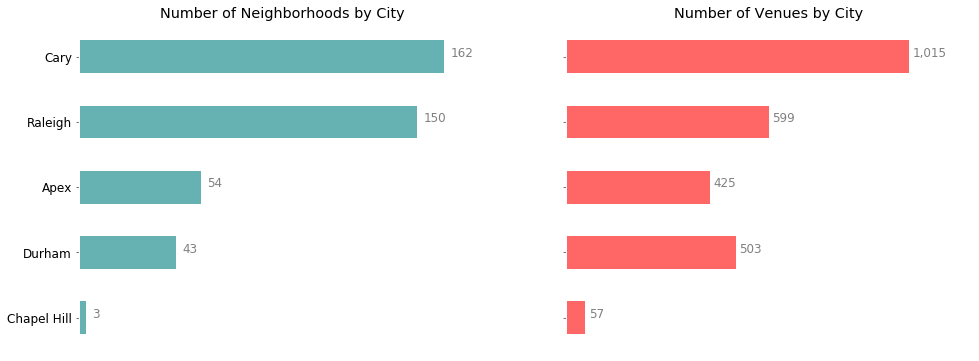

In [7]:
# Let's create 2 plots to answer these questions
fig = plt.figure(figsize=[16, 6])
ax1 = fig.add_subplot(1, 2, 1, facecolor='w')
ax2 = fig.add_subplot(1, 2, 2, facecolor='w', sharey=ax1)

# Add 1st plot to show number of neighborhoods by city
nbh_by_city = df_nbh['Neighborhood'].groupby(df_nbh['City']).count().sort_values()
nbh_by_city.plot(kind='barh',
                 title='Number of Neighborhoods by City',
                 color='teal',
                 alpha=0.6,
                 ax=ax1)
yticklabels = nbh_by_city.index

# Add 2nd plot to show number of venues by city
df_merged = triangle_venues.merge(df_nbh[['City', 'Neighborhood']], on='Neighborhood')
venues_by_city = df_merged['Venue'].groupby(df_merged['City']).count().reindex(yticklabels)
venues_by_city.plot(kind='barh',
                    title='Number of Venues by City',
                    color='red',
                    alpha=0.6,
                    ax=ax2)

# Define function to anotate the labels of each plot
def auto_annotate(series, size, axes=plt, color='grey', dist=0):
    for index, value in enumerate(series): 
        label = format(int(value), ',') # format int with commas

        # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
        axes.annotate(label, xy=(value + dist, index), color=color, ha='left', fontsize=size)
        
        
auto_annotate(nbh_by_city,
              axes=ax1,
              dist=3,
              size=12)

auto_annotate(venues_by_city,
              axes=ax2,
              dist=10,
              size=12)

# Improve the asthetic of the plot
ax1.set_xlim(0, 180) # Increase plot limit to make sure annotations are included
ax1.set_xticks([]) # Clean x tick marks
ax1.set_ylabel(None) # Clean y field name 'City'
ax1.set_yticklabels(labels=ax1.get_yticklabels(), fontdict={'fontsize': 12}, color='black') # Make city name pops

ax2.set_xlim(0, 1200)
ax2.set_xticks([])

plt.show()

According to the chart above, **Cary** leads in the number of neighborhoods, and subsequently in the number of venues. Raleigh comes in second in both criteria. Interestingly, even though **Durham** has less neighborhoods than **Apex**, the venues count is higher, suggesting denser concentration of venues around the Bull city. **Chapel Hill** is the sparsest city in term of neighborhoods and venues among the top 5 city of the Triangle.

**How many unique types of venues are there?**

In [8]:
print('There are {} unique types of venues.'.format(np.unique(triangle_venues['Venue Category']
                                                             ).shape[0]
                                                   )
     )
top10venues = triangle_venues['Venue'].groupby(triangle_venues['Venue Category']
                                              ).count().sort_values(ascending=False
                                                                   ).head(10).index.values
print('Among them, the top 10 venue types with highest count are:', ', '.join(top10venues))

There are 283 unique types of venues.
Among them, the top 10 venue types with highest count are: Pizza Place, Pool, Park, Gym, Coffee Shop, Bar, Bakery, Mexican Restaurant, Trail, Sandwich Place
